# Get introduced to Machine Learning by doing one

## Digit recognition using kNN 

### Grasp at least some intuitive knowledge about algorithms and their use cases

<img src="images/KNN%20Train%20Example.png" height="70%" width="70%">

<img src="images/KNN%20Test%20Added.png" height="70%" width="70%">

# If it walks like a duck, quacks like a duck, and looks like a duck, then it's probably a duck.

### How come that decision was made?

<img src="images/mindistance.png" height="70%" width="70%">

### Is 1-Neighbor approach good?

<img src="images/mindistancenoise.png" height="70%" width="70%">

### What if we take all training examples?

<img src="images/mindistancetakeall.png" height="70%" width="70%">

## What can we do?
k-NN(k-Nearest Neighbor Algorithm).

#### K = 3
<img src="images/mindistancenoiseavoide.png" height="70%" width="70%">

## Can we now develop a computer program to do things we made up in our mind?

#### Machine learning (ML) is a category of algorithm that allows software applications to become more accurate in predicting outcomes without being explicitly programmed.

## Why Python Python Python!!!

Packages, Packages everywhere !!!!
- Want to work with images — numpy, opencv, scikit
- Want to work in text — nltk, scikit
- Want to work in audio — librosa
- Want to solve machine learning problem — pandas, scikit
- Want to see the data clearly — matplotlib, seaborn, scikit
- Want to use deep learning — tensorflow, pytorch
- Want to do scientific computing — scipy
- Want to integrate web applications — Django
- Want to go with other language …. It's your call

## Let's import library that can handle our data

In [1]:
import numpy as np

#### Now create numpy variables for training data

In [2]:
X_train = np.array([[2.  , 3.  ],
                    [1.  , 2.5 ],
                    [2.5 , 1.75],  # noise
                    [1.5 , 1.  ],
                    [4.  , 5.  ],
                    [4.5 , 4.  ],
                    [6.  , 5.  ],
                    [5.  , 5.  ],
                    [4.  , 5.5 ],
                    [4.  , 5.5 ]])
y_train = np.array(['red',
                    'red',
                    'blue',  # noise
                    'red',
                    'blue',
                    'blue',
                    'blue',
                    'blue',
                    'blue',
                    'blue'])
print(X_train)
y_train

[[2.   3.  ]
 [1.   2.5 ]
 [2.5  1.75]
 [1.5  1.  ]
 [4.   5.  ]
 [4.5  4.  ]
 [6.   5.  ]
 [5.   5.  ]
 [4.   5.5 ]
 [4.   5.5 ]]


array(['red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue'], dtype='<U4')

In [3]:
X_train[:, 0], X_train[:, 1], y_train

(array([2. , 1. , 2.5, 1.5, 4. , 4.5, 6. , 5. , 4. , 4. ]),
 array([3.  , 2.5 , 1.75, 1.  , 5.  , 4.  , 5.  , 5.  , 5.5 , 5.5 ]),
 array(['red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue',
        'blue', 'blue'], dtype='<U4'))

In [4]:
X_train.shape, y_train.shape

((10, 2), (10,))

#### Visualize data 

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], s=100, color=y_train)

# Now we proceed to create our predictor

First of all we need a function to calculate the distance between test instance and every training instance

Lets explore fancy thing about `numpy` by implementing distance formula

\begin{equation*}
d = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 }
\end{equation*}

Calculate difference

In [6]:
print(X_train)
# (x1  - x2) (y1 - y2)
diff = X_train - [3, 2]  # This is called broadcasting in `numpy`
diff

[[2.   3.  ]
 [1.   2.5 ]
 [2.5  1.75]
 [1.5  1.  ]
 [4.   5.  ]
 [4.5  4.  ]
 [6.   5.  ]
 [5.   5.  ]
 [4.   5.5 ]
 [4.   5.5 ]]


array([[-1.  ,  1.  ],
       [-2.  ,  0.5 ],
       [-0.5 , -0.25],
       [-1.5 , -1.  ],
       [ 1.  ,  3.  ],
       [ 1.5 ,  2.  ],
       [ 3.  ,  3.  ],
       [ 2.  ,  3.  ],
       [ 1.  ,  3.5 ],
       [ 1.  ,  3.5 ]])

Calculate square of difference

In [7]:
print(diff)
# (x1  - x2)^2 (y1 - y2)^2
sq_diff = diff**2
sq_diff

[[-1.    1.  ]
 [-2.    0.5 ]
 [-0.5  -0.25]
 [-1.5  -1.  ]
 [ 1.    3.  ]
 [ 1.5   2.  ]
 [ 3.    3.  ]
 [ 2.    3.  ]
 [ 1.    3.5 ]
 [ 1.    3.5 ]]


array([[ 1.    ,  1.    ],
       [ 4.    ,  0.25  ],
       [ 0.25  ,  0.0625],
       [ 2.25  ,  1.    ],
       [ 1.    ,  9.    ],
       [ 2.25  ,  4.    ],
       [ 9.    ,  9.    ],
       [ 4.    ,  9.    ],
       [ 1.    , 12.25  ],
       [ 1.    , 12.25  ]])

Calculate sum of square of difference for each instance

In [8]:
print(sq_diff)
# (x1  - x2)^2 + (y1 - y2)^2
sum_sqdiff = np.sum(sq_diff, axis=1)
sum_sqdiff

[[ 1.      1.    ]
 [ 4.      0.25  ]
 [ 0.25    0.0625]
 [ 2.25    1.    ]
 [ 1.      9.    ]
 [ 2.25    4.    ]
 [ 9.      9.    ]
 [ 4.      9.    ]
 [ 1.     12.25  ]
 [ 1.     12.25  ]]


array([ 2.    ,  4.25  ,  0.3125,  3.25  , 10.    ,  6.25  , 18.    ,
       13.    , 13.25  , 13.25  ])

Calculate square root of each `sum_sqdiff`

In [9]:
print(sum_sqdiff)
np.sqrt(sum_sqdiff)

[ 2.      4.25    0.3125  3.25   10.      6.25   18.     13.     13.25
 13.25  ]


array([1.41421356, 2.06155281, 0.55901699, 1.80277564, 3.16227766,
       2.5       , 4.24264069, 3.60555128, 3.64005494, 3.64005494])

## Put those scratch code together to create a function that calculate distances

In [10]:
def distance(X, y):
#     return np.sqrt(np.sum((X - y)**2, axis=1))
    return np.sqrt(np.sum((X - y)**2, axis=1))

Call `distance(X, y)` function for test and see the results

In [11]:
distance(np.array([[1, 2], [3, 4]]), [5, 6]) 

array([5.65685425, 2.82842712])

## Create the predictor

Lets see how we can predict the label of a test instance `[3, 2]`

In [12]:
dist = distance(X_train, [3, 2])
dist

array([1.41421356, 2.06155281, 0.55901699, 1.80277564, 3.16227766,
       2.5       , 4.24264069, 3.60555128, 3.64005494, 3.64005494])

In [13]:
min_idx = np.argsort(dist)
min_idx

array([2, 0, 3, 1, 5, 4, 7, 8, 9, 6])

In [14]:
k_min_labels = y_train[min_idx[:5]]  # k < total number of training examples
k_min_labels

array(['blue', 'red', 'red', 'red', 'blue'], dtype='<U4')

In [15]:
values, counts = np.unique(k_min_labels, return_counts=True)
values, counts

(array(['blue', 'red'], dtype='<U4'), array([2, 3]))

In [16]:
values[np.argmax(counts)]

'red'

# Create a function to predict labels of test set

In [17]:
def knn_predictor(X_train, y_train, predict_X, k):
    y_predict = []
    for predict_x in predict_X:
        dist = distance(X_train, predict_x)
        min_idx = np.argsort(dist)
        k_min_labels = y_train[min_idx[:k]]
        values, counts = np.unique(k_min_labels, return_counts=True)
        y_predict.append(values[np.argmax(counts)])
    return np.array(y_predict)

# Using `knn_predictor(X_train, y_train, X_test, k)` for prediction

#### Create data for prediction

In [18]:
predict_X = np.array([[5.5, 6],
                      [6, 4],
                      [3, 2],
                      [2, 3.5]])

#### Call predictor

In [19]:
y_predict = knn_predictor(X_train, y_train, predict_X, k=3)
y_predict

array(['blue', 'blue', 'red', 'red'], dtype='<U4')

# Visualize the prediction

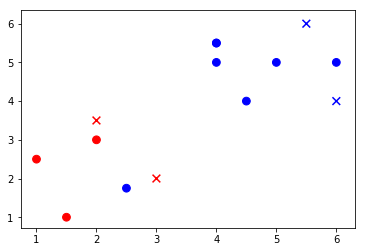

In [20]:
# plot training data with `dot`(default) as marker
plt.scatter(X_train[:, 0], X_train[:, 1], s=60, color=y_train)

# plot prediction data with 'X' as marker
plt.scatter(predict_X[:, 0], predict_X[:, 1], s=60, marker='x', color=y_predict)

# Using machine learning library (scikit-learn)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_prediction = neigh.predict(predict_X) 
y_prediction

array(['blue', 'blue', 'red', 'red'], dtype='<U4')

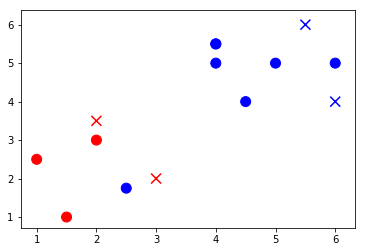

In [22]:
plt.scatter(X_train[:, 0], X_train[:, 1], s=100, color=y_train)
plt.scatter(predict_X[:, 0], predict_X[:, 1], s=100, color=y_prediction, marker='x')

<img src="images/machinelearning_meme.png">

# Lets use kNN to recognize digits

### Wait kNN requires training data to which we can measure distance from data to be predicted.
### And we have image!!!!
#### How can we measure distance between images?

Welcome to the world of data preprocessing
- About 75% of machine learning task, because machine algorithm are `from sklearn import *`
- Handling missing datas
- Feature scaling
- Data representation ready to be feed in ML Algorithms and, so on.

## How image can be represented in numpy?

<img src="images/imagematrix.png">

#### We can unravel 2D-Matrix represntation to 1D-Vector
\begin{array}
\big[ 157 & 153 & .... & 155 & 156 & 155 & 182 & ... & ......... & 243 & 236 & 196 & ... & 13 & 96 & 218 \big]
\end{array}


# Searching for datasets

### sklearn provides  some common dataset like MNIST, Iris, etc

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [24]:
mnist = datasets.load_digits()

## Understanding data is important.
### Inspect datasets

#### Python can print almost every object in most readable format

In [25]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [26]:
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [27]:
mnist.data.shape

(1797, 64)

This means datasets contain 1797 images each with 64 pixels(1D-Matrix representation)

## Plot a digit using matplotlib

In [28]:
n=100
test_plot_digit = mnist.data[n].reshape(8, 8)
test_plot_digit   

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

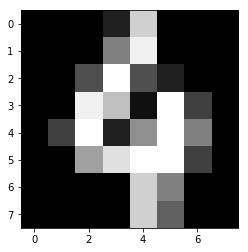

In [31]:
plt.imshow(test_plot_digit, cmap='gray')

In [32]:
mnist.target[n]

1

1


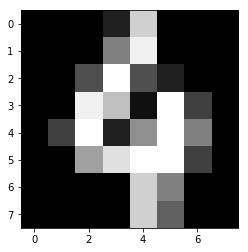

In [33]:
plt.imshow(test_plot_digit, cmap='gray')  # You can also use `mnist.image[n]`
print(mnist.target[n])

# Visualizing the Dataset

PCA Algorithm can reduce dimension of datasets


<img src="images/DimensionalityReduction.png" style="height:500px">

## Now we will visualize MNIST digit dataset using PCA Algorithm

#### Import matplotlib 3d library

In [34]:
from mpl_toolkits.mplot3d import Axes3D

#### Import PCA algorithm

In [35]:
from sklearn.decomposition import PCA

### Create a PCA instance with 3 principal components; we want 3d plot of 64d data

In [36]:
pca = PCA(n_components=3)

### Transform the MNIST 64d data to 3d

In [37]:
mnist_pca = pca.fit_transform(mnist.data)
mnist_pca, mnist_pca.shape

(array([[ -1.25946625,  21.2748827 ,  -9.46305309],
        [  7.95761131, -20.76870356,   4.43950755],
        [  6.99192296,  -9.95598465,   2.95855627],
        ...,
        [ 10.8012843 ,  -6.96025077,   5.59955334],
        [ -4.8720993 ,  12.42394342, -10.17085968],
        [ -0.34438947,   6.3655556 ,  10.77370579]]), (1797, 3))

<IPython.core.display.Javascript object>


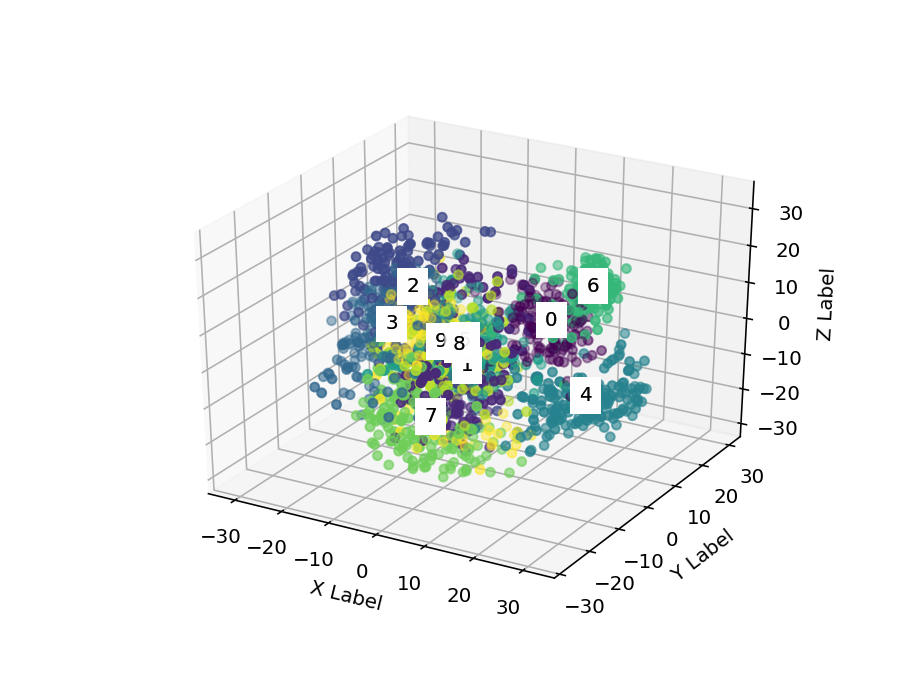

Text(0.5, 0, 'Z Label')

In [38]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in mnist.target:
    ax.text3D(mnist_pca[mnist.target == label, 0].mean(),
              mnist_pca[mnist.target == label, 1].mean(),
              mnist_pca[mnist.target == label, 2].mean(), label,
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

ax.scatter(mnist_pca[:, 0], mnist_pca[:, 1], mnist_pca[:, 2], c=mnist.target)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

## Datasets are not always such simple. There is high possibility of incorrect labeling, missing values and sometime transfer function need to be aplied in datasets to feed in the algorithms.

### Statistical, Probabilistics approach are used.

#### This is where hard work is done.

# Now we have data and `scikit-learn` has algorithm implemented.
## What are you waiting for?

In [39]:
mnist_neigh = KNeighborsClassifier(n_neighbors=6)
mnist_neigh.fit(mnist.data, mnist.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

### Make prediction for an example and check if it is write

In [42]:
mnist_neigh.predict(mnist.data[10])

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
 16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
  0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
  0.  0.  0.  0.  1. 10. 13.  3.  0.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

`KNeighborsClassifier.predict(X)` takes X of dimension `(m, n)` where
- `m`: number of prediction to be made
- `n`: number of features in each test examples(in this case `64`)

Make the example of shape `(1, 64)` and make prediction 

In [44]:
mnist_neigh.predict(mnist.data[10].reshape((1, 64))), mnist.target[10]

(array([0]), 0)

# Performance of the Algorithm

### Make predictions off all training examples

In [46]:
train_prediction = mnist_neigh.predict(mnist.data)
train_prediction

array([0, 1, 2, ..., 8, 9, 8])

### Measure accuracy
\begin{equation*}
accuracy = \frac{number\;of\;correct\;prediction}{total\;number\;of\;prediction}
\end{equation*}


In [47]:
np.sum(train_prediction == mnist.target)/mnist.data.shape[0]

0.989983305509182

### Are we doing great?

### Hell no! Remember,
#### Machine Learning algorithms should also generalize to the examples which it never sees provided that alien is from same distribution(No Free Lunch Theorem)

<img src="images/train_test_split.png">

### You can do it by using numpy indexing and slicing
#### Why worry if library provides such services

In [48]:
from sklearn.model_selection import train_test_split
(train_data, test_data, train_labels, test_labels) = train_test_split(
    mnist.data, mnist.target, shuffle=True, test_size=0.2) 

In [49]:
print("Number of training data: ", train_data.shape[0])
print("Number of test data: ", test_data.shape[0])
print("Shape of training data: ", train_data.shape) 
print("Shape of test data: ", test_data.shape)
print("Shape of training data labels: ", train_labels.shape)
print("Shape of test data labels: ", test_labels.shape)

Number of training data:  1437
Number of test data:  360
Shape of training data:  (1437, 64)
Shape of test data:  (360, 64)
Shape of training data labels:  (1437,)
Shape of test data labels:  (360,)


### Now fit KNeighbors using training data

In [50]:
mnist_neigh = KNeighborsClassifier(n_neighbors=6)
mnist_neigh.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

### Accuracy in train and test sets

In [51]:
train_predict = mnist_neigh.predict(train_data)
train_set_accuracy = np.sum(train_predict == train_labels) / train_data.shape[0]
print('Training set accuracy: ', train_set_accuracy)
test_predict = mnist_neigh.predict(test_data)
test_set_accuracy = np.sum(test_predict == test_labels) / test_data.shape[0]
print('Test set accuracy: ', test_set_accuracy)

Training set accuracy:  0.988865692414753
Test set accuracy:  0.9833333333333333


## Using `scikit-learn` performance measure metrices

Accuracy

In [52]:
from sklearn import metrics
print("Test set accuracy: ", metrics.accuracy_score(test_labels, test_predict))

Test set accuracy:  0.9833333333333333


Confusion Matrix

In [53]:
confusion_matrix_test = metrics.confusion_matrix(test_labels, test_predict)
confusion_matrix_test

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  1, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 50]])

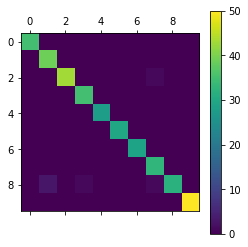

In [54]:
%matplotlib inline
cax=plt.matshow(confusion_matrix_test)
plt.colorbar(cax)

### Problem with using Accuracy metric only

Would you believe someone who claimed to create a model entirely in their head to identify terrorists trying to board flights with greater than 99% accuracy? 

Well, here is the model: simply label every single person flying from a US airport as not a terrorist.

Given the 800 million average passengers on US flights per year and the 19 (confirmed) terrorists who boarded US flights from 2000–2017, this model achieves an astounding accuracy of 99.9999999%! That might sound impressive,

# Beyond Accuracy: Precision and Recall

<img src="images/precisionrecall.png">

<b>Precision</b>($P$) is defined as the number of true positives ($T_p$) over the number of true positives plus the number of false positives ($F_p$).

$P = \frac{T_p}{T_p + F_p}$

The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.


<img src="images/precisionrecall.png">

The<b> recall </b>($R$)is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives.

$R = \frac{T_p}{T_p + F_n}$

The recall is intuitively the ability of the classifier to find all the positive samples.

In [55]:
print("Test set precision: ", metrics.precision_score(test_labels, test_predict, average='micro'))
print("Test set recall: ", metrics.recall_score(test_labels, test_predict, average='micro'))

Test set precision:  0.9833333333333333
Test set recall:  0.9833333333333333


### See wrongly predicted test data

In [56]:
idx = (test_labels != test_predict)
wrongly_predicted_testdata = test_data[idx][0]
wrongly_predicted_testlabel = test_predict[idx][0]
actual_testlabel = test_labels[idx][0]

Prediction:  1
Actual:  8


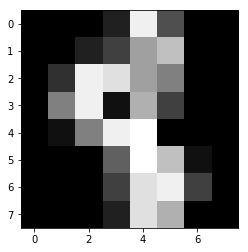

In [57]:
print("Prediction: ", wrongly_predicted_testlabel)
print("Actual: ", actual_testlabel)
# plt.figure(figsize=(1,1))
plt.imshow(wrongly_predicted_testdata.reshape((8, 8)), cmap='gray')

# What can we do to make it perform even better?

#### Try changing the parameter of the algorithms

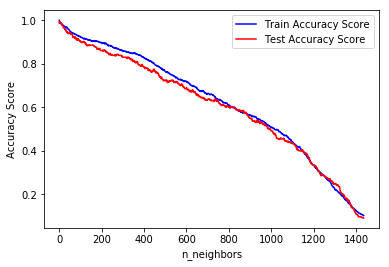

In [120]:
n_neighbors = list(range(1, train_data.shape[0]))
train_results = []
test_results = []

for n_neighbor in n_neighbors:
    ngh = KNeighborsClassifier(n_neighbors=n_neighbor)
    ngh.fit(train_data, train_labels)
    train_results.append(metrics.accuracy_score(train_labels, ngh.predict(train_data)))
    test_results.append(metrics.accuracy_score(test_labels, ngh.predict(test_data)))

plt.plot(n_neighbors, train_results, 'b', label='Train Accuracy Score')
plt.plot(n_neighbors, test_results, 'r', label='Test Accuracy Score')

plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Score')
plt.legend()

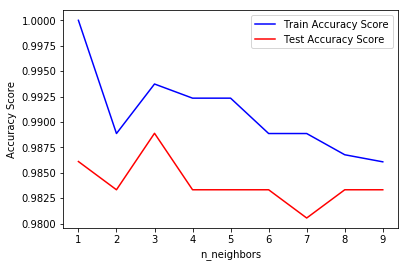

In [58]:
%matplotlib inline
n_neighbors = list(range(1, 10))
train_results = []
test_results = []

for n_neighbor in n_neighbors:
    ngh = KNeighborsClassifier(n_neighbors=n_neighbor)
    ngh.fit(train_data, train_labels)
    train_results.append(metrics.accuracy_score(train_labels, ngh.predict(train_data)))
    test_results.append(metrics.accuracy_score(test_labels, ngh.predict(test_data)))

plt.plot(n_neighbors, train_results, 'b', label='Train Accuracy Score')
plt.plot(n_neighbors, test_results, 'r', label='Test Accuracy Score')

plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Score')
plt.legend()

In [59]:
ngh_best = KNeighborsClassifier(n_neighbors=1)
ngh_best.fit(train_data, train_labels)
print("Train set accuracy: ", metrics.accuracy_score(train_labels, ngh_best.predict(train_data)))
print("Test set accuracy: ", metrics.accuracy_score(test_labels, ngh_best.predict(test_data)))

Train set accuracy:  1.0
Test set accuracy:  0.9861111111111112


#### Switching to another Machine Learning Model

##### What are the cons of using `kNN` ?

- <b>Lazy learner</b>

Lazy learning is a learning method in which generalization of the training data is delayed until a query is made to the system. Hence prediction is slow.

- <b>Character datasets are best generalized by other algorithms</b>

Neural Networks have achieved upto `99.51%` accuracy in MNIST dataset

- <b>Curse of dimensionality</b>

Worst performance when number of feature increases and features are related to each other

# Eager Learner

<img src="images/eager_learner.png" width="600">

# Taking everything into account

## Machine Learning Practice is exhaustive search of algorithms and their parameters in order to find one that best generalizes the given representative training datasets of certain distribution.

## Defining the Skills That You Need

- Understand what tools are available

- Learn languages

- Explore algorithms

- Select appropriate models

- Understand the value of probability and statistics

- Understand data management

# AI,ML,DL

<ul>
    <li>Artificial Intelligence — Human Intelligence Exhibited by Machines</li>
    <li>Machine Learning — An Approach to Achieve Artificial Intelligence</li>
    <li>Deep Learning — A Technique for Implementing Machine Learning</li>
</ul>
    

## Examples

<ul>
<li>Facebook facerecognition</li>
<li>Google map</li>
<li>Google Search</li>
</ul>

# Numpy and Pandas


<ul>
    <li>Numpy :package for Scientific Computing.Useful features for operation on N-dimension arrays structure</li>
    <li>Pandas:Data structure manipulatio,.Good IO capalibities</li>
    </ul>




# Supervised Learning

<ul>
    <li>Train by label Data</li>
    <li>Relation between dependent and independent variable</li>
    <li>Human act as Teacher</li>
    </ul>


# Unsupervised Learning

<ul>
    <li>Train by unlabled data</li>
    <li>Knows patterns itself</li>
    <li>Unknown features identification</li>
    <li>Clustering,Association Rules.</li>
    </ul>


# Reinforcement Learning



<ul>
<li> Agent automatically determine behaviour</li>
<li>Require reward feedback to learn</li> 
</ul>


# Data Preprocessing

<ul>
<li>Transformation of raw data</li>
<li>Handling missing data</li> 
<li>Reduction</li> 
<li>Remove outliers</li>
<li>Scaling</li>   
</ul>

# Model Building

<ul>
<li>Dataset</li>
<li>Data Preprocessing</li>
<li>Split Data to train and test</li>
<li>Train algorithm</li>
<li>Evaluation of Model</li>
<li>Overfitting and Underfitting</li>
</ul>


# Framework

<ul>
<li>PyTorch</li>
<li>Keras</li>
<li>Tensorflow</li>
</ul>


# Skill Required

<ul>
<li>Probability and Statistics:probability distribution,regression,sampling etc</li>
<li>Machine Learning Algorithms</li>
<li>Linear algebra: know how to work with matrices </li>
</ul>

# How to start?


<ul>
    <li>Believe you can practice and apply machine learning</li>
    <li>tutorials</li>
    <li>Start with simple projects like Titanic dataset,Breast cancer etc</li>
    <li>Practice on real dataset</li>
    </ul>

# Dataset Source

<ul>
<li>Kaggle</li>
    <li>uci:https://archive.ics.uci.edu/ml/datasets.html</li>
    </ul>

# Some Helpful Resources:

- Algebra: [MIT](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/videolectures/)
- Data and Algorithms: [MIT](https://ocw.mit.edu/courses/electrical-engineering-and-computerscience/6-006-introduction-to-algorithms-fall-2011/lecture-videos/)
- Machine Learning: [Stanford](https://see.stanford.edu/Course/CS229)
- Programming:[Stanford](https://see.stanford.edu/Course/CS106A)
- Machine Learning [Coursera](https://www.coursera.org/learn/machine-learning) Recommended for absolute beginner
- Deep Learning [Coursera](https://www.coursera.org/specializations/deep-learning)
    